### Analysis of Stock Market Trends for Leading Tech Companies

In this project, we will examine data from Yahoo Finance for three well-known tech stocks.

We will utilize Pandas to extract and analyze the data, visualize trends, and assess risks based on historical performance.

Here are the questions we aim to address:

- How did the stock price change over time?
- What was the average daily return of each stock?
- What were the moving averages for different stocks?
- What is the relationship between the daily returns of various stocks?
- What level of risk is associated with investing in a particular stock?
- How can we forecast future stock trends?

**This notebook was created in a single session, with no kernel restarts. My goal is to demonstrate that data analysis isn't always smooth sailing. At times, you may need to install additional libraries or even modify your code to get everything to work properly.**

In [2]:
!conda install numpy -y


Channels:
 - r
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - numpy


The following NEW packages will be INSTALLED:

  numpy-base         pkgs/main/osx-arm64::numpy-base-1.26.4-py312he047099_0 




Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [3]:
conda list


# packages in environment at /opt/anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2024.06         py312_openblas_2  
abseil-cpp                20230802.0           h313beb8_2  
aext-assistant            4.0.15          py312hca03da5_jl4_0  
aext-assistant-server     4.0.15          py312hca03da5_0  
aext-core                 4.0.15          py312hca03da5_jl4_0  
aext-core-server          4.0.15          py312hca03da5_1  
aext-panels               4.0.15          py312hca03da5_0  
aext-panels-server        4.0.15          py312hca03da5_0  
aext-share-notebook       4.0.15          py312hca03da5_0  
aext-share-notebook-server 4.0.15          py312hca03da5_0  
aext-shared               4.0.15          py312hca03da5_0  
aiobotocore               2.12.3          py312hca03da5_0  
aiohttp                   3.9.5           py312h80987f9_0  
aioitertools              0.7.1              pyhd3eb1b0_0  
aiosignal                 1.2.0     

In [4]:
import sys
print(sys.executable)


/opt/anaconda3/bin/python


In [5]:
conda install numpy=1.24


Channels:
 - r
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: / warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - package numpy-1.24.3-py310hb93e574_0 requires python >=3.10,<3.11.0a0, but none of the providers can be installed

Could not solve for environment specs
The following packages are incompatible
├─ numpy 1.24**  is installable with the potential options
│  ├─ numpy 1.24.3 would require
│  │  └─ python >=3.10,<3.11.0a0 , which can be installed;
│  ├─ numpy 1.24.3 would require
│  │  └─ python >=3.11,<3.12.0a0 , which can be installed;
│  ├─ numpy 1.24.3 would require
│  │  └─ python >=3.8,<3.9.0a0 , which can be installed;
│  ├─ numpy 1.24.3 would require
│  │  └─ python >=3.9,<3.10.0a0 , which can be installed;
│  ├─ numpy [1.24.0|1.24.1|1.24.2|1.24.3|1.24.4] would require
│  │  └─ python >=3.10,<3.11.0a0 *_cpython, which can be installed;
│  ├─ numpy [1

In [13]:
!conda install -c anaconda pandas-datareader -y


Channels:
 - anaconda
 - r
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-datareader-0.10.0   |     pyhd3eb1b0_0          71 KB  anaconda
    ------------------------------------------------------------
                                           Total:          71 KB

The following NEW packages will be INSTALLED:

  pandas-datareader  anaconda/noarch::pandas-datareader-0.10.0-pyhd3eb1b0_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [17]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

In [19]:
#We are going to analyze the top three tech giants.
tg_list = ['AAPL','MSFT','GOOG']

In [21]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [23]:
#using yahoo finance to grab crytocurrency data
for tg in tg_list:
    globals()[tg] = pdr.DataReader(tg,'yahoo',start,end)

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AAPL/history?period1=1699326000&period2=1731034799&interval=1d&frequency=1d&filter=history
Response Text:
b'<html><meta charset=\'utf-8\'><script>if(window!=window.top){document.write(\'<p>Content is currently unavailable.</p><img src="//geo.yahoo.com/p?s=1197757039&t=\'+new Date().getTime()+\'&_R=\'+encodeURIComponent(document.referrer)+\'&err=404&err_url=\'+\'https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FAAPL%2Fhistory%2Findex.html\'+\'" width="0px" height="0px"/>\');}else{window.location.replace(\'https://www.yahoo.com/?err=404&err_url=https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FAAPL%2Fhistory%2Findex.html\');}</script><noscript><META http-equiv="refresh" content="0;URL=\'https://www.yahoo.com/?err=404&err_url=https%3A%2F%2Fbrb.yahoo.net%3A443%2Ffinance.yahoo.com%2Fdesktop%2Fquote%2FAAPL%2Fhistory%2Findex.html\'"></noscript></html>'

In [25]:
pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.7-cp312-cp312-macosx_11_0_arm64.whl size=263901 sha256=9adc2b6d5f9c8e1b944d6dca80c1b660345365fcb1585074c2f0d5764bff8d6e
  Stored in directory: /Users/diva/Library/Caches/pip/wheels/d8/b7/b5/bc5cfc21613ff88ce55cf4151a9f32e23bd8f4a2c4d51e7c8b
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [39]:
import yfinance as yf

# Define the list of ticker symbols and the date range
tg_list = ["AAPL", "MSFT", "GOOG"]  # Replace with your tickers
start = "2023-01-01"  # Specify start date
end = "2023-12-31"    # Specify end date

# Use yfinance to download daily data
data = {}
for tg in tg_list:
    # Download data and select only required columns
    df = yf.download(tg, start=start, end=end)[["Open", "High", "Low", "Close", "Volume"]]
    # Reset the index and convert date to remove time component
    df = df.reset_index()
    df['Date'] = df['Date'].dt.date  # Convert to date only (no time)
    data[tg] = df

# Now `data` dictionary holds daily data for each ticker with date only, no time component.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [41]:
AAPL.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-01-03 00:00:00+00:00,123.904625,125.070000,130.899994,124.169998,130.279999,112117500
2023-01-04 00:00:00+00:00,125.182617,126.360001,128.660004,125.080002,126.889999,89113600
2023-01-05 00:00:00+00:00,123.855087,125.019997,127.769997,124.760002,127.129997,80962700
2023-01-06 00:00:00+00:00,128.412231,129.619995,130.289993,124.889999,126.010002,87754700
2023-01-09 00:00:00+00:00,128.937317,130.149994,133.410004,129.889999,130.470001,70790800


In [43]:
#STATISTICS FOR APPLE'S STOCK
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,171.470440,172.549000,173.857520,170.981880,172.256681,5.921703e+07
std,17.437952,17.331672,17.261055,17.535099,17.530359,1.777392e+07
min,123.855087,125.019997,127.769997,124.169998,126.010002,2.404830e+07
25%,160.847191,162.112499,162.387501,160.699997,161.555000,4.781208e+07
50%,174.581657,175.475006,177.025002,173.840004,175.244995,5.507750e+07
75%,186.470272,187.330002,188.095001,185.174995,186.805000,6.574292e+07
max,197.361084,198.110001,199.619995,197.000000,198.020004,1.543573e+08


In [45]:
#INFORMATION ABOUT APPLE DATAFRAME
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  250 non-null    float64
 1   (Close, AAPL)      250 non-null    float64
 2   (High, AAPL)       250 non-null    float64
 3   (Low, AAPL)        250 non-null    float64
 4   (Open, AAPL)       250 non-null    float64
 5   (Volume, AAPL)     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### What is the change in stock's price over time?

<Axes: xlabel='Date'>

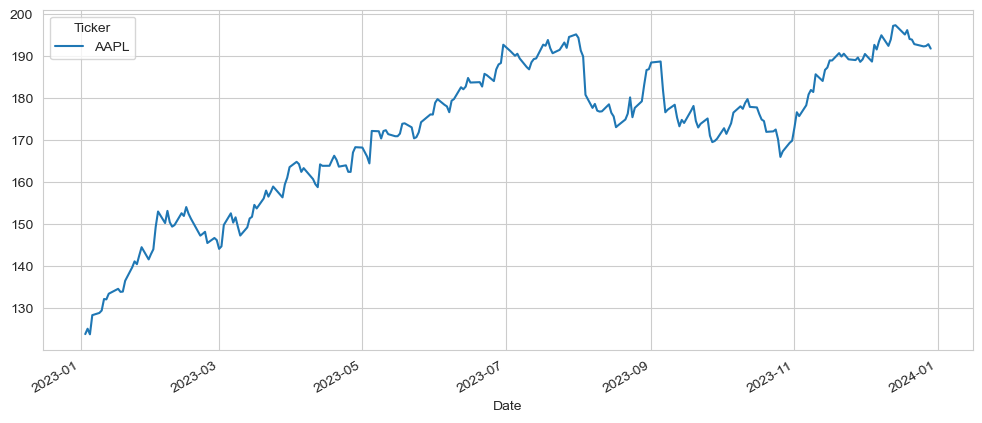

In [48]:
#Using pandas we canplot the stocks adjusted closing price
AAPL['Adj Close'].plot(legend = True, figsize=(12,5))

<Axes: xlabel='Date'>

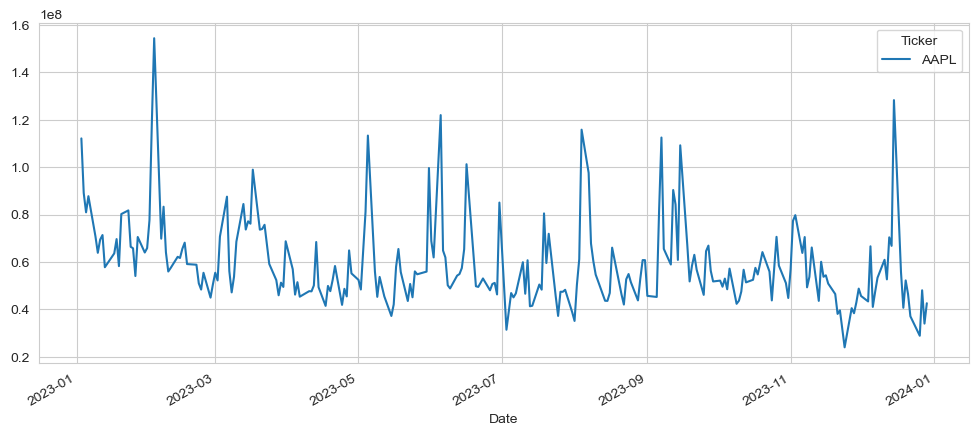

In [50]:
#Using pandas once more to plot the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### What was the average moving value of the stocks?

In [53]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [55]:
AAPL.tail()

Price,Adj Close,Close,High,Low,Open,Volume,MA 10 days,MA 20 days,MA 50 days
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,,
2023-12-22 00:00:00+00:00,192.868149,193.600006,195.410004,192.970001,195.179993,37122800,195.007019,192.936375,184.605998
2023-12-26 00:00:00+00:00,192.320221,193.050003,193.889999,192.830002,193.610001,28919300,194.994070,193.098759,184.893613
2023-12-27 00:00:00+00:00,192.419830,193.149994,193.500000,191.089996,192.490005,48087700,194.838658,193.235740,185.185807
2023-12-28 00:00:00+00:00,192.848206,193.580002,194.660004,193.169998,194.139999,34049900,194.402313,193.445444,185.517809
2023-12-29 00:00:00+00:00,191.802170,192.529999,194.399994,191.729996,193.899994,42628800,193.846422,193.573957,185.854956


<Axes: xlabel='Date'>

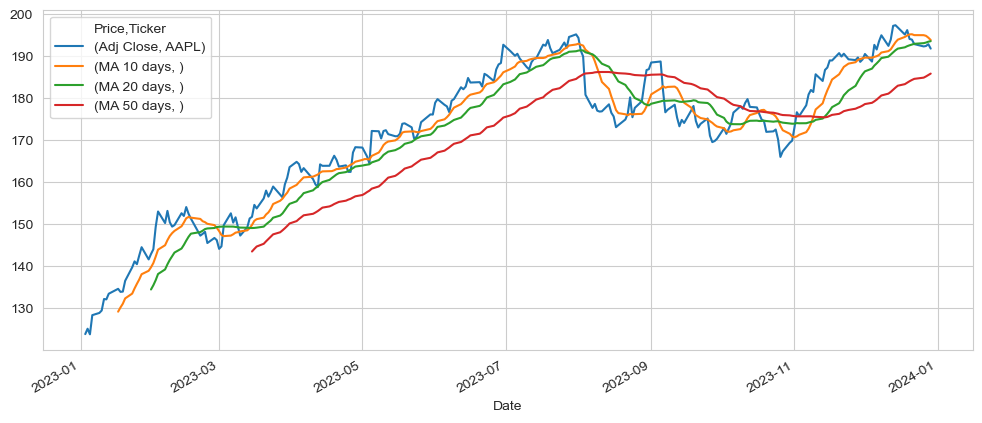

In [57]:
AAPL[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(figsize=(12,5))

There were some slight declines in July and October, but overall, the trend was upward.

### What was the average daily return of the stock?

In [61]:
#In order calculate daily return we can use the percentage change of the adjusted closing price

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].tail()

Date
2023-12-22 00:00:00+00:00   -0.005547
2023-12-26 00:00:00+00:00   -0.002841
2023-12-27 00:00:00+00:00    0.000518
2023-12-28 00:00:00+00:00    0.002226
2023-12-29 00:00:00+00:00   -0.005424
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

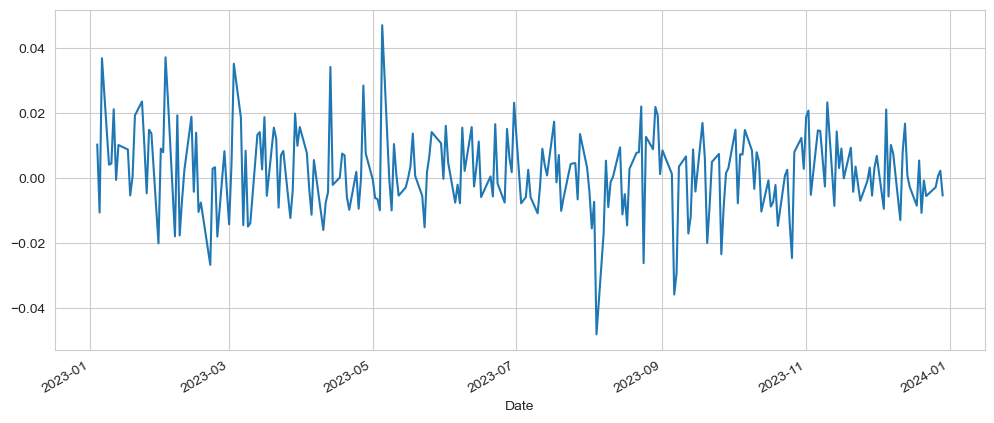

In [63]:
#Let us now plot the daily return
AAPL['Daily Return'].plot(figsize=(12,5))

<Axes: ylabel='Frequency'>

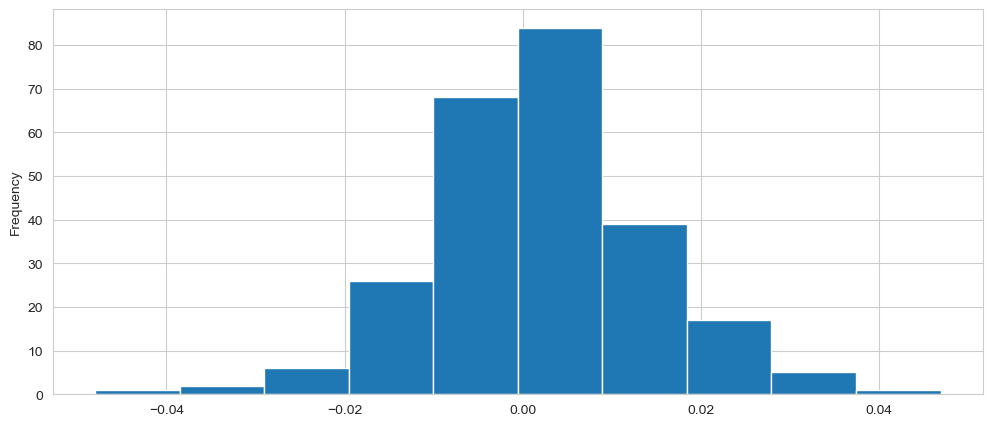

In [65]:
AAPL['Daily Return'].plot(kind='hist',figsize=(12,5))

Positive daily returns appear to occur more often than negative returns.

### What was the correlation between daily returns of different stocks?

In [69]:
#Let's read the 'Adj Close' column from all the tech giants

close_df = pdr.DataReader(tg_list,'yahoo',start,end)['Adj Close']

/opt/anaconda3/lib/python3.12/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AAPL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.12/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'MSFT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/opt/anaconda3/lib/python3.12/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GOOG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: No data fetched using 'YahooDailyReader'

In [71]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [73]:
import yfinance as yf
import pandas as pd

# Define the list of ticker symbols and the date range
tg_list = ["AAPL", "MSFT", "GOOG"]  # Replace with your tickers
start = "2023-01-01"  # Specify start date
end = "2023-12-31"    # Specify end date

# Use yfinance to download the adjusted close prices
close_data = pd.DataFrame()
for tg in tg_list:
    # Download data and extract the 'Adj Close' column
    df = yf.download(tg, start=start, end=end)[["Adj Close"]]
    df = df.rename(columns={"Adj Close": tg})  # Rename column to ticker name
    close_data = pd.concat([close_data, df], axis=1)  # Concatenate each stock's data

# Print the resulting DataFrame
print(close_data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                            AAPL        MSFT        GOOG
Ticker                           AAPL        MSFT        GOOG
Date                                                         
2023-01-03 00:00:00+00:00  123.904625  236.183502   89.480255
2023-01-04 00:00:00+00:00  125.182617  225.852081   88.492676
2023-01-05 00:00:00+00:00  123.855087  219.158371   86.557426
2023-01-06 00:00:00+00:00  128.412231  221.741211   87.944031
2023-01-09 00:00:00+00:00  128.937317  223.900162   88.582466
...                               ...         ...         ...
2023-12-22 00:00:00+00:00  192.868149  372.543915  142.370361
2023-12-26 00:00:00+00:00  192.320221  372.623505  142.470123
2023-12-27 00:00:00+00:00  192.419830  372.036713  141.093506
2023-12-28 00:00:00+00:00  192.848206  373.240112  140.933899
2023-12-29 00:00:00+00:00  191.802170  373.995972  140.584747

[250 rows x 3 columns]


In [77]:
close_data.tail()

Price,AAPL,MSFT,GOOG
Ticker,AAPL,MSFT,GOOG
Date,,,
2023-12-22 00:00:00+00:00,192.868149,372.543915,142.370361
2023-12-26 00:00:00+00:00,192.320221,372.623505,142.470123
2023-12-27 00:00:00+00:00,192.419830,372.036713,141.093506
2023-12-28 00:00:00+00:00,192.848206,373.240112,140.933899
2023-12-29 00:00:00+00:00,191.802170,373.995972,140.584747


In [81]:
#Let's explore the returns again using the percentage change from the adj close.
returns_df = close_data.pct_change()

In [83]:
returns_df.tail()

Price,AAPL,MSFT,GOOG
Ticker,AAPL,MSFT,GOOG
Date,,,
2023-12-22 00:00:00+00:00,-0.005547,0.002784,0.006488
2023-12-26 00:00:00+00:00,-0.002841,0.000214,0.000701
2023-12-27 00:00:00+00:00,0.000518,-0.001575,-0.009662
2023-12-28 00:00:00+00:00,0.002226,0.003235,-0.001131
2023-12-29 00:00:00+00:00,-0.005424,0.002025,-0.002477


ValueError: If using all scalar values, you must pass an index

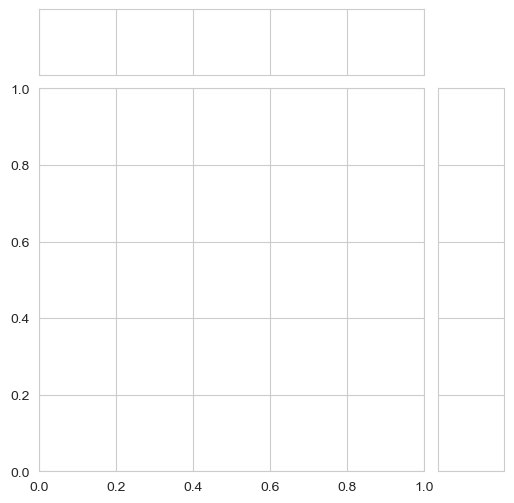

In [87]:
#We can now try to find the correlation between Apple and Google
import seaborn as sns

# Assuming `returns_df` is a DataFrame with columns 'GOOG' and 'AAPL'
sns.jointplot(x='GOOG', y='AAPL', data=returns_df, kind='scatter')


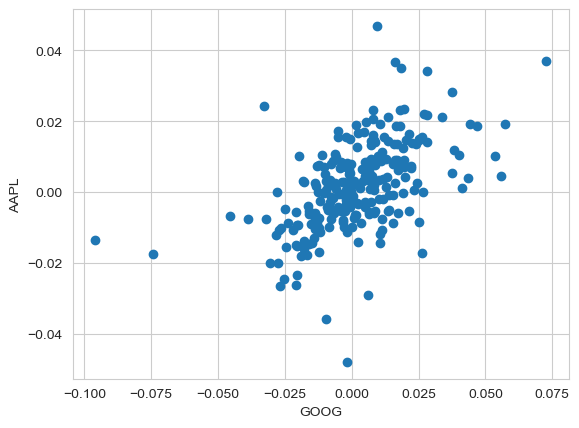

In [89]:
import matplotlib.pyplot as plt

plt.scatter(returns_df['GOOG'], returns_df['AAPL'])
plt.xlabel('GOOG')
plt.ylabel('AAPL')
plt.show()


ValueError: If using all scalar values, you must pass an index

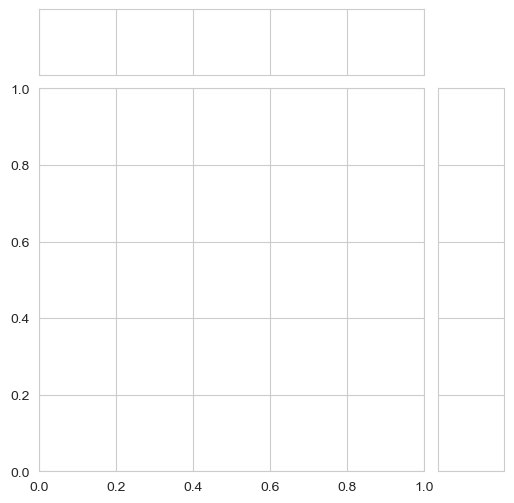

In [93]:
sns.jointplot(x='GOOG', y='AAPL', data=returns_df, kind='hex')


In [95]:
returns_df[['GOOG', 'AAPL']].head()


Price,GOOG,AAPL
Ticker,GOOG,AAPL
Date,,
2023-01-03 00:00:00+00:00,NaN,NaN
2023-01-04 00:00:00+00:00,-0.011037,0.010314
2023-01-05 00:00:00+00:00,-0.021869,-0.010605
2023-01-06 00:00:00+00:00,0.016019,0.036794
2023-01-09 00:00:00+00:00,0.007260,0.004089


In [97]:
returns_df[['GOOG', 'AAPL']].isna().sum()


Price  Ticker
GOOG   GOOG      1
AAPL   AAPL      1
dtype: int64

In [101]:
returns_df = returns_df.dropna(subset=['GOOG', 'AAPL'])


KeyError: ['GOOG', 'AAPL']

In [103]:
print(returns_df.columns)


MultiIndex([('AAPL', 'AAPL'),
            ('MSFT', 'MSFT'),
            ('GOOG', 'GOOG')],
           names=['Price', 'Ticker'])


In [105]:
print(returns_df.head())


Price                          AAPL      MSFT      GOOG
Ticker                         AAPL      MSFT      GOOG
Date                                                   
2023-01-03 00:00:00+00:00       NaN       NaN       NaN
2023-01-04 00:00:00+00:00  0.010314 -0.043743 -0.011037
2023-01-05 00:00:00+00:00 -0.010605 -0.029638 -0.021869
2023-01-06 00:00:00+00:00  0.036794  0.011785  0.016019
2023-01-09 00:00:00+00:00  0.004089  0.009736  0.007260


In [107]:
returns_df.columns = returns_df.columns.get_level_values(1)


In [109]:
returns_df = returns_df.dropna(subset=['AAPL', 'GOOG'])


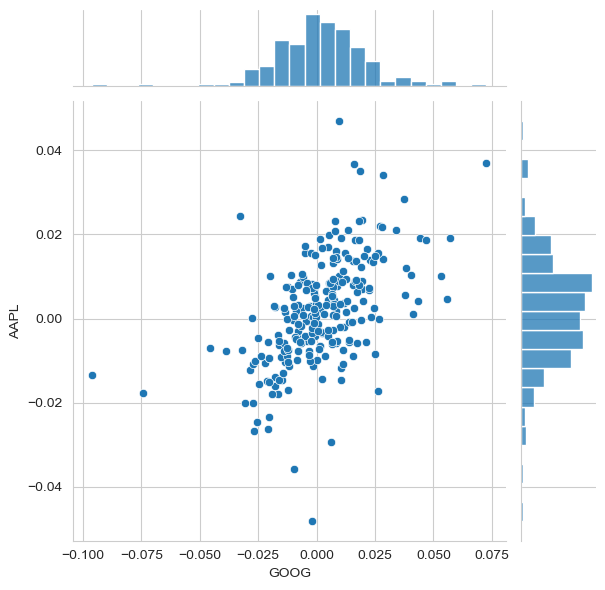

In [113]:
sns.jointplot(x='GOOG', y='AAPL', data=returns_df, kind='scatter')


There seems to be a minor positive correlation between the two, the pearsonr correlation coefficient value of 0.5 agrees with that statement.

Let's use a pairplot to visualize all the tech giants in one view.

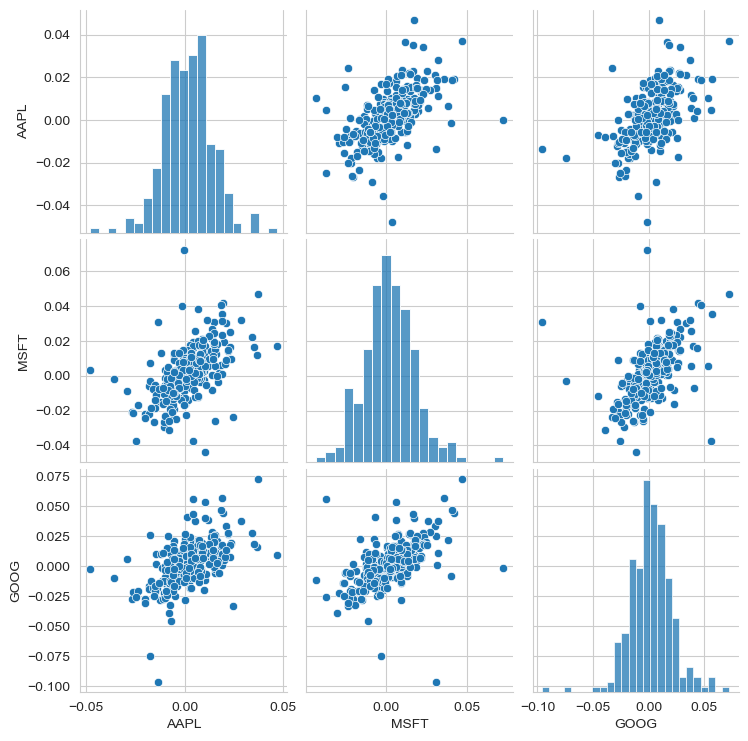

In [116]:
sns.pairplot(returns_df.dropna())

Quick and easy way to view correlations but let's use a correlation plot to see the actual numbers.

<Axes: xlabel='Ticker', ylabel='Ticker'>

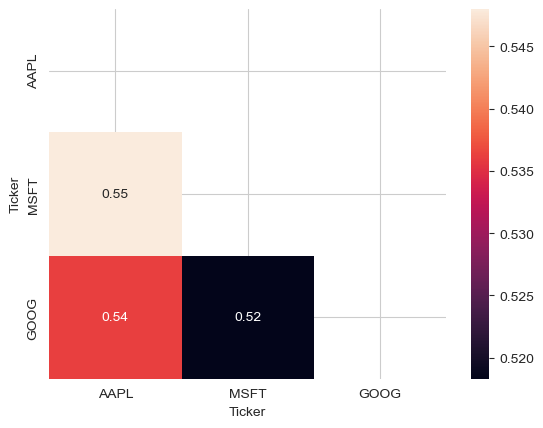

In [119]:
corr = returns_df.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True,mask=mask)

- THE END -